# aprendizaje automatico  (machine learning)
k-means (clustering - algoritmo no supervisado)


In [1]:
import pandas as pd

In [2]:
ruta = './Mall_Customers-2.csv'
df = pd.read_csv(ruta, index_col=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.rename({'Annual Income (k$)':'Ingreso', 'Spending Score (1-100)':'Ponderacion'},axis=1, inplace=True)
df.head()

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.describe()

,Age,Ingreso,Ponderacion
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Ponderacion,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

# segementacion tradicional


<Axes: ylabel='Frequency'>

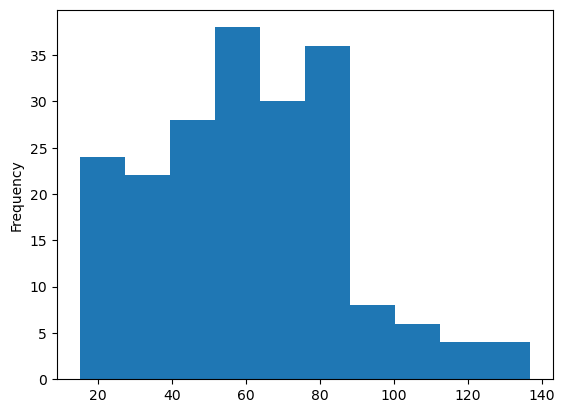

In [9]:
df.Ingreso.plot.hist()

In [10]:
import matplotlib.pyplot as plt, seaborn as sns 
sns.set()

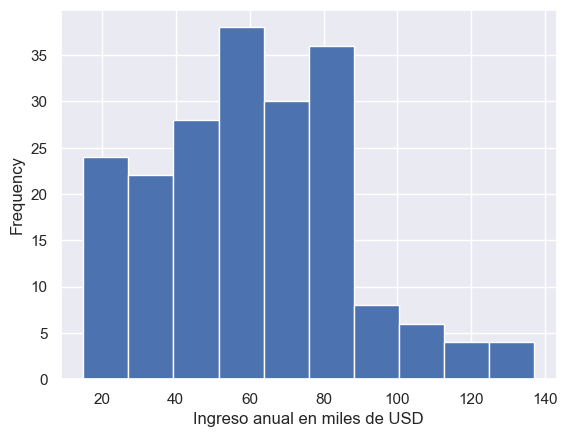

In [11]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso anual en miles de USD');

### reglas a seguir
si el ingreso es menor a 50 'ingreso bajo'
si el ingreso se encuentra entre 50 y 90 entonces 'ingreso moderado'
si el ingreso es mayor a 90 'ingreso alto'


In [12]:
import numpy as np 

In [13]:
df['Segmento']= np.where(df.Ingreso >= 90 ,'ingreso alto',
                        np.where(df.Ingreso<50,'ingreso bajo','ingreso moderado'))
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [14]:
df.groupby('Segmento')['Ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


Estandarizacion de datos 


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
col_a_escalar = ['Age','Ingreso','Ponderacion']
datos_a_escalar = df.copy()

In [18]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])

In [19]:
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


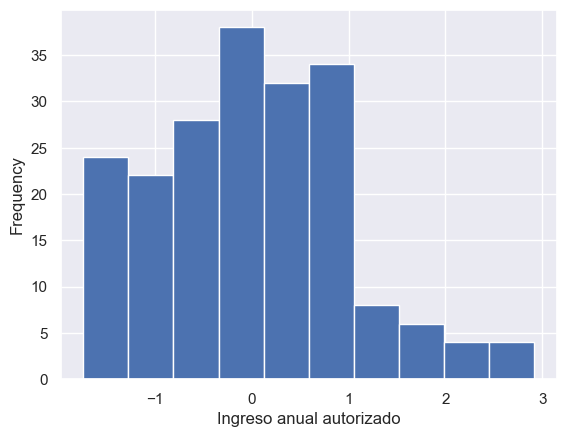

In [20]:
datos_a_escalar.Ingreso.plot.hist()
plt.xlabel('Ingreso anual autorizado');

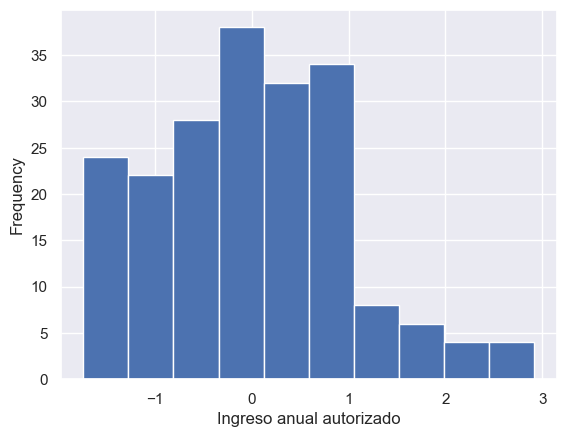

In [21]:
datos_a_escalar.Ingreso.plot.hist()
plt.xlabel('Ingreso anual autorizado');
cluster_cols = ['Ingreso', 'Ponderacion']

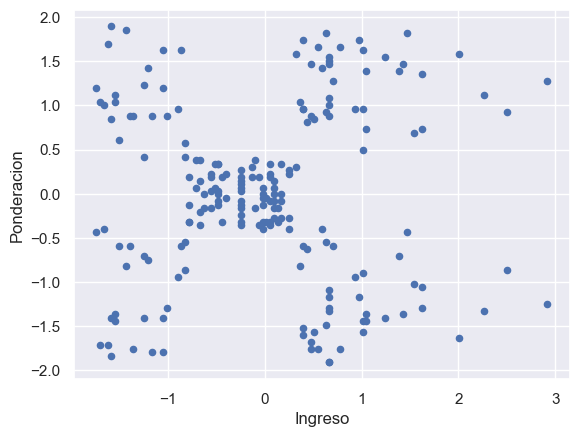

In [22]:
datos_a_escalar.plot.scatter(x = 'Ingreso', y = 'Ponderacion');

In [23]:
from sklearn.cluster import KMeans

In [24]:
modelo = KMeans(n_clusters = 5, random_state = 28)

modelo.fit(datos_a_escalar[cluster_cols])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=28)

In [25]:
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[cluster_cols])

datos_a_escalar.Segmento.value_counts()

datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
0    39
3    35
4    23
2    22
Name: count, dtype: int64

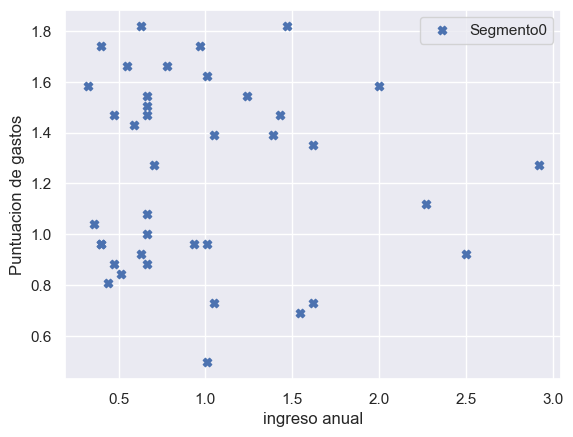

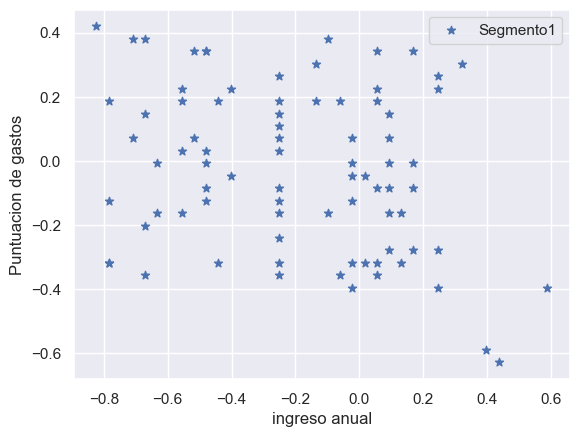

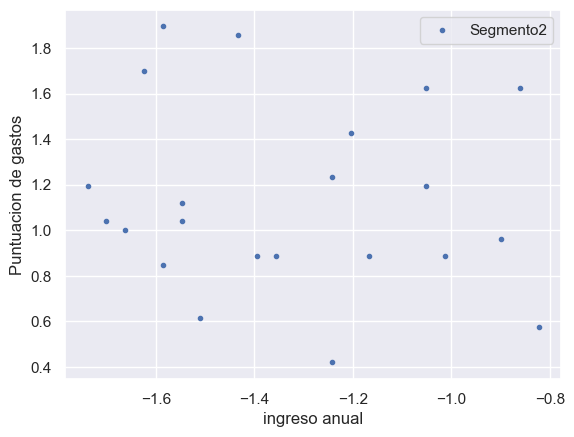

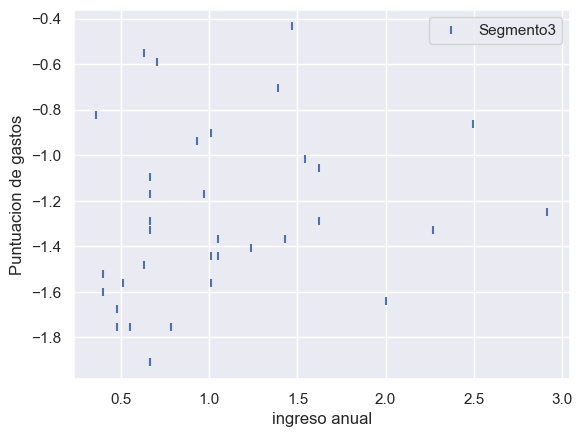

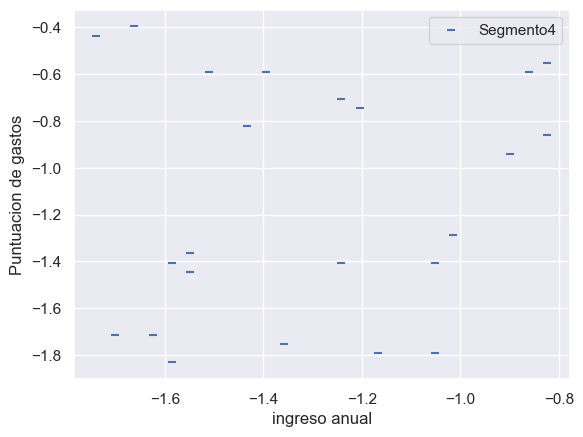

In [28]:
marcador = ['X', '*', '.', '|', '_' ]
for segmento in range(5):
    temporal = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(temporal.Ingreso, temporal.Ponderacion, marker= marcador[segmento],
						label = 'Segmento' + str(segmento))
    plt.xlabel('ingreso anual')
    plt.ylabel('Puntuacion de gastos')
    plt.legend()
    plt.show();

In [29]:
cluster_cols  = ['Age', 'Ingreso', 'Ponderacion']
datos_a_escalar[cluster_cols].head()

,Age,Ingreso,Ponderacion
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [34]:
modelo2 = KMeans(n_clusters = 4, random_state = 28)
modelo2.fit(datos_a_escalar[cluster_cols])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=28)

In [35]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[cluster_cols])
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,ingreso bajo,4,1
2,Male,-1.281035,-1.738999,1.195704,ingreso bajo,2,1
3,Female,-1.352802,-1.700830,-1.715913,ingreso bajo,4,1
4,Female,-1.137502,-1.700830,1.040418,ingreso bajo,2,1
5,Female,-0.563369,-1.662660,-0.395980,ingreso bajo,4,1
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,ingreso alto,0,0
197,Female,0.441365,2.497807,-0.861839,ingreso alto,3,3
198,Male,-0.491602,2.497807,0.923953,ingreso alto,0,0


In [36]:
from sklearn import decomposition

In [37]:
pca = decomposition.PCA(n_components = 2)
pca_resultado = pca.fit_transform(datos_a_escalar[cluster_cols])
pca_resultado

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [45]:
datos_a_escalar['PC1'] = pca_resultado[:,0]
datos_a_escalar['PC2'] = pca_resultado[:,1]

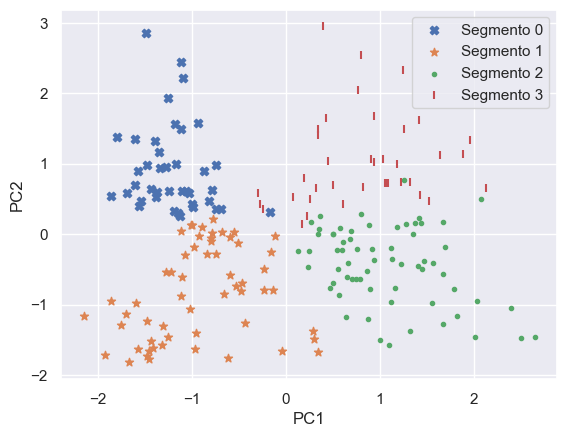

In [46]:
for segmento in range (4):
	temporal = datos_a_escalar[datos_a_escalar.Segmento3 == segmento] 
	plt.scatter(temporal.PC1, temporal.PC2, marker = marcador[segmento], 
						label='Segmento '+ str(segmento))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [50]:
from yellowbrick.cluster import KElbowVisualizer

In [61]:
modelo = KMeans()
visualizador = KElbowVisualizer(modelo, k=(1,15))
X = df.copy()
X.drop(labels={'Segmento'},axis=1,inplace = True)

In [66]:
X

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [67]:
from sklearn.preprocessing import normalize

In [72]:
X['Gender'] = pd.get_dummies(df['Gender']).values[:,0]

In [73]:
X1 = normalize(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

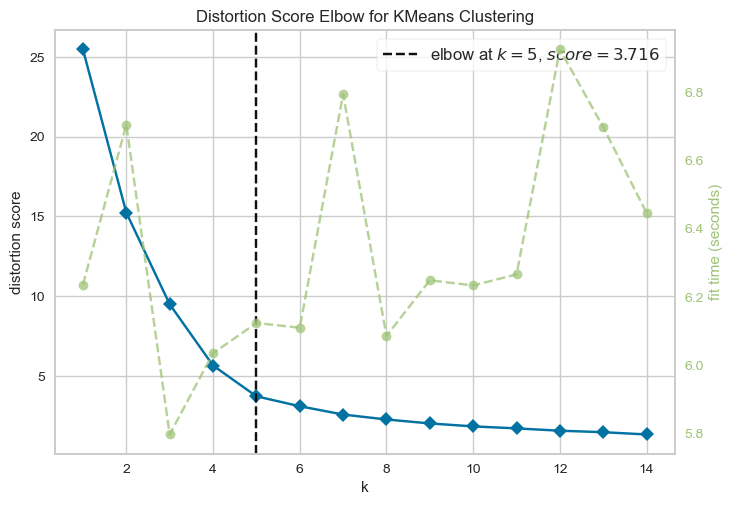

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
visualizador.fit(X1)
visualizador.show()

In [77]:
cliente = df[['Age', 'Ingreso', 'Ponderacion']].copy()

In [79]:
km = KMeans(n_clusters = 5, n_init=100, max_iter= 1000, init='random')

In [80]:
prediccionkm = km.fit_predict(cliente)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [83]:
silhouette_score(cliente,prediccionkm)

0.44428597560893024

In [85]:
calinski_harabasz_score(cliente, prediccionkm)

151.0438600016067

In [86]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


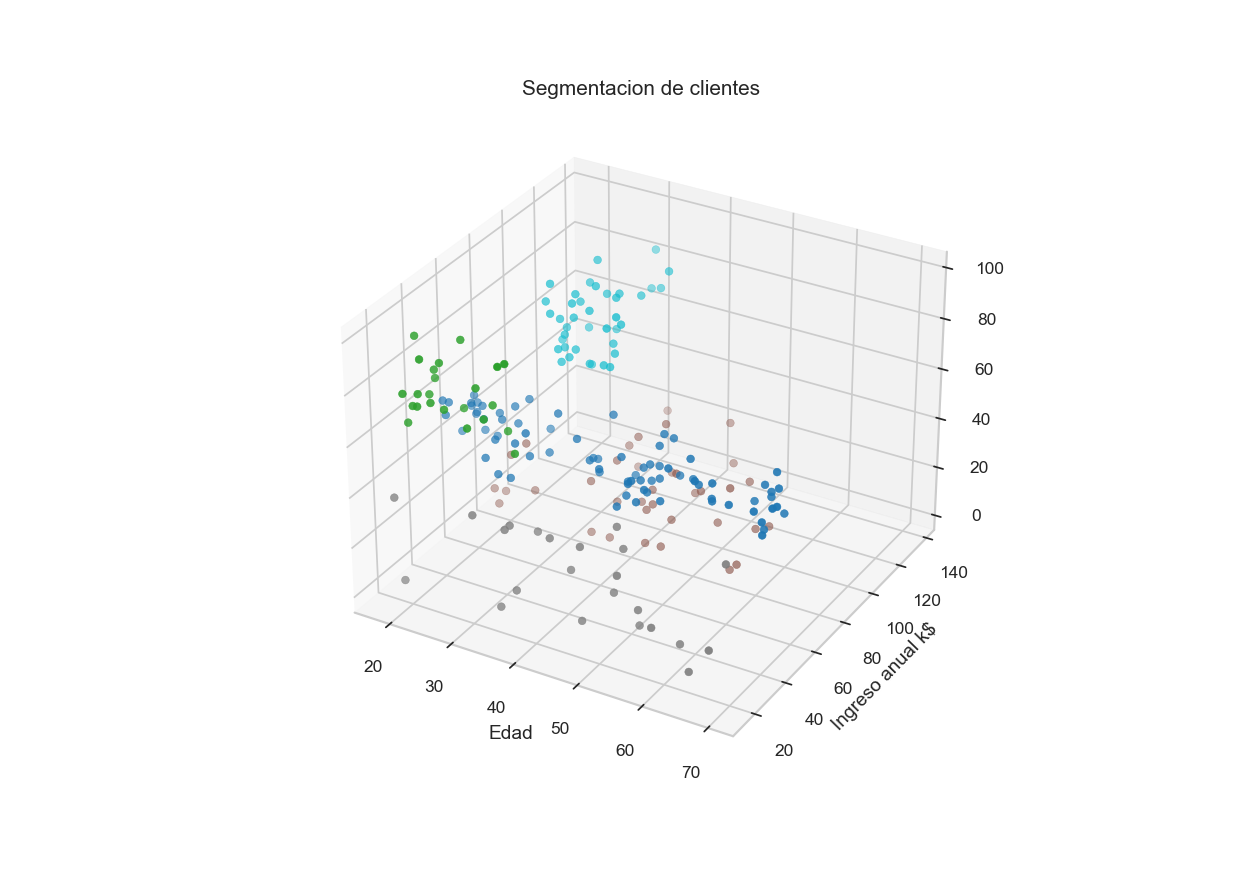

In [89]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax. scatter3D(cliente['Age'], cliente['Ingreso'], cliente['Ponderacion'],
            c = prediccionkm, cmap = 'tab10')
plt.title('Segmentacion de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual k$')
plt.show()